<a href="https://colab.research.google.com/github/leonfrench/polyprotein_stats/blob/main/depreciated/bio_embeddings_combine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This is data processing code that loads in embeddings and summarizes them before writing out. 

#It also generates umap embeddings


In [ ]:
!pip install umap-learn

In [1]:
import umap
import pandas as pd
import functools
import numpy as np
import os, random
from datetime import datetime
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: ignored

In [ ]:
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
embedding_file_path = './gdrive/MyDrive/data/protein_embeddings/'
embedding_file_path_processed = './gdrive/MyDrive/data/protein_embeddings_processed/'
if not os.path.exists(embedding_file_path_processed):
    os.makedirs(embedding_file_path_processed)

In [ ]:
embedding_files = os.listdir(embedding_file_path)

In [ ]:
#enable for testing subset
#embedding_files = random.sample(embedding_files, k=20)

In [ ]:
embedding_files

['embedding_all.52400.csv',
 'embedding_all.52440.csv',
 'embedding_all.52480.csv',
 'embedding_all.52520.csv',
 'embedding_all.52560.csv',
 'embedding_all.52600.csv',
 'embedding_all.52640.csv',
 'embedding_all.52680.csv',
 'embedding_all.52720.csv',
 'embedding_all.52760.csv',
 'embedding_all.52800.csv',
 'embedding_all.52840.csv',
 'embedding_all.52880.csv',
 'embedding_all.52920.csv',
 'embedding_all.52960.csv',
 'embedding_all.53000.csv',
 'embedding_all.53040.csv',
 'embedding_all.53080.csv',
 'embedding_all.53120.csv',
 'embedding_all.53160.csv',
 'embedding_all.53200.csv',
 'embedding_all.53240.csv',
 'embedding_all.53280.csv',
 'embedding_all.53320.csv',
 'embedding_all.53360.csv',
 'embedding_all.53400.csv',
 'embedding_all.53440.csv',
 'embedding_all.53480.csv',
 'embedding_all.53520.csv',
 'embedding_all.53560.csv',
 'embedding_all.53600.csv',
 'embedding_all.53640.csv',
 'embedding_all.53680.csv',
 'embedding_all.53720.csv',
 'embedding_all.53760.csv',
 'embedding_all.5380

In [ ]:
#read all the csvs and merge 
all_embeddings = pd.DataFrame()
for embed_file_i in embedding_files:
  print(embed_file_i)
  embeddings = pd.read_csv(os.path.join(embedding_file_path, embed_file_i))
  all_embeddings = pd.concat(objs = [all_embeddings, embeddings])

embedding_all.52400.csv
embedding_all.52440.csv
embedding_all.52480.csv
embedding_all.52520.csv
embedding_all.52560.csv
embedding_all.52600.csv
embedding_all.52640.csv
embedding_all.52680.csv
embedding_all.52720.csv
embedding_all.52760.csv
embedding_all.52800.csv
embedding_all.52840.csv
embedding_all.52880.csv
embedding_all.52920.csv
embedding_all.52960.csv
embedding_all.53000.csv
embedding_all.53040.csv
embedding_all.53080.csv
embedding_all.53120.csv
embedding_all.53160.csv
embedding_all.53200.csv
embedding_all.53240.csv
embedding_all.53280.csv
embedding_all.53320.csv
embedding_all.53360.csv
embedding_all.53400.csv
embedding_all.53440.csv
embedding_all.53480.csv
embedding_all.53520.csv
embedding_all.53560.csv
embedding_all.53600.csv
embedding_all.53640.csv
embedding_all.53680.csv
embedding_all.53720.csv
embedding_all.53760.csv
embedding_all.53800.csv
embedding_all.53840.csv
embedding_all.53880.csv
embedding_all.53920.csv
embedding_all.53960.csv
embedding_all.54000.csv
embedding_all.54

In [ ]:
all_embeddings.shape

(92400, 1025)

In [ ]:
#pull out the gene symbol
all_embeddings['gene_symbol'] = all_embeddings['protein_ID'].str.split(pat="|", n=-1, expand=True)[6]
all_embeddings.drop('protein_ID', axis=1, inplace=True) 

In [ ]:
#reorder columns
cols = all_embeddings.columns.tolist()
cols = cols[-1:] + cols[:-1]
all_embeddings = all_embeddings[cols]

In [ ]:
all_embeddings.head()

,gene_symbol,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,ELMO1,0.005479,0.021553,-0.000155,0.006905,0.026664,0.004286,-0.011652,0.007574,-0.012171,0.022753,0.004869,-0.013597,-0.021270,0.027924,0.001610,-0.033498,0.033722,0.006491,-0.013280,-0.586647,0.042017,-0.013618,-0.009345,-0.013167,-0.001458,0.030495,0.010248,0.038862,0.026549,-0.006268,0.036922,0.021730,-0.009337,-0.009796,-0.012467,0.019069,-0.015545,-0.023842,-0.000351,...,0.020658,-0.053125,-0.012788,0.061337,-0.007650,0.011290,-0.035974,0.033184,0.015209,-0.011375,-0.009786,0.036587,0.000002,0.011692,-0.004955,-0.018799,-0.014481,0.024013,-0.023902,-0.022032,0.045635,0.003859,-0.028309,0.003190,0.001138,-0.019414,0.007774,0.028861,-0.006641,0.028395,0.022482,-0.055241,-0.009923,-0.010998,0.014111,-0.033167,0.001241,-0.013252,-0.026050,0.004350
1,NIPSNAP2,0.037170,-0.002894,0.023612,0.023207,0.019330,0.018191,-0.045001,0.002881,0.027244,0.008984,0.045065,-0.004526,0.004303,0.049002,0.004847,-0.051598,0.020832,0.004669,0.000881,-0.105201,0.012995,0.014557,-0.008627,-0.020146,-0.060945,-0.006062,0.016460,0.061464,0.040814,-0.001288,0.021774,0.002753,-0.049373,0.000041,0.002343,0.028912,-0.106122,-0.018389,0.030626,...,0.068990,-0.020635,-0.063504,0.058131,-0.011164,0.034072,-0.042092,0.000308,0.039100,0.033524,-0.004513,0.009334,0.017709,-0.007965,-0.061549,-0.022580,-0.053812,0.028090,-0.000619,0.008387,0.042703,0.011304,-0.008833,-0.010983,0.010493,-0.035074,-0.014988,0.017574,0.039673,-0.020461,0.021759,-0.045761,-0.021645,-0.000291,-0.049506,-0.015417,-0.007459,0.004231,-0.016412,0.001650
2,YWHAG,0.041730,-0.034204,-0.009545,0.011983,0.013941,0.055145,0.017634,0.061027,-0.023687,0.000005,0.031931,-0.033201,-0.026798,0.098748,-0.076343,0.052000,0.094641,0.005185,-0.042233,0.190221,0.006278,0.039899,-0.023269,-0.021863,-0.030425,-0.017074,-0.033144,0.090036,0.013404,-0.020402,-0.017622,0.039055,-0.001628,0.008185,-0.030015,0.016194,-0.119051,0.017924,0.017718,...,0.050673,-0.078581,-0.061057,0.028780,-0.087816,-0.025684,-0.037427,0.029893,0.053906,-0.062307,-0.005208,-0.035282,0.057639,0.024209,0.018823,0.044990,-0.066232,-0.008368,0.030190,0.016902,0.041807,0.033861,-0.000739,0.033674,0.031050,-0.032901,0.028493,0.020148,0.016925,0.016726,0.024822,-0.106193,0.034794,0.027895,-0.086687,-0.032171,-0.002485,-0.033786,-0.029510,-0.037574
3,FAM133B,-0.051556,-0.022784,0.038378,0.062918,-0.031791,-0.004337,-0.014532,0.025072,0.004631,0.022039,0.052875,-0.006798,0.041347,0.037091,-0.042500,0.062902,0.038133,-0.000783,0.042959,-0.632709,-0.003201,0.063945,-0.028033,0.075841,-0.059214,0.071075,0.013748,0.060064,-0.043516,0.063432,0.017817,-0.005863,-0.017863,-0.074288,0.044513,0.022987,-0.122343,-0.024594,-0.017910,...,0.035464,-0.039694,-0.036913,-0.061294,-0.039859,-0.004296,-0.001485,0.021249,-0.000224,-0.019489,0.029171,0.019169,0.008235,0.039499,0.029095,0.025758,-0.046463,0.065545,-0.032076,-0.004530,0.012569,0.074051,0.051319,0.023449,0.052811,0.002904,-0.031079,-0.016632,-0.011909,-0.030777,0.096566,-0.067474,0.003052,-0.023095,0.119117,-0.007332,0.061379,-0.013541,-0.087801,-0.013615
4,PRSS1,-0.006596,-0.013367,0.033825,-0.013836,0.001829,-0.019119,-0.016651,-0.053331,0.006235,0.026417,0.029509,0.004030,0.037780,0.068855,-0.029007,-0.000294,-0.011292,0.030657,-0.012468,0.115512,-0.023483,-0.005945,0.030462,0.008379,-0.001118,0.023388,-0.022604,0.018848,-0.010727,-0.004175,0.000779,0.013553,-0.013961,0.032586,-0.000633,0.008354,0.145130,0.014910,0.013432,...,0.051402,-0.009732,-0.039144,0.026456,-0.037693,-0.015399,-0.023881,0.140096,0.006799,-0.000084,-0.050070,0.034447,0.031317,-0.007071,0.005908,-0.017637,-0.006271,0.014451,0.032874,-0.014975,0.009722,-0.013651,0.010588,-0.016927,0.063710,-0.047855,0.021252,0.02731

In [ ]:
#combine multiple genes into single rows
all_embeddings = all_embeddings.groupby('gene_symbol').agg('mean')

In [ ]:
all_embeddings = all_embeddings.reset_index()

In [ ]:
all_embeddings.head()

,gene_symbol,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,A1BG,-0.003932,0.012953,-0.025788,-0.018497,0.012149,-0.027315,-0.045698,-0.032446,-0.018771,-0.032345,-0.001785,-0.035948,-0.010812,0.015197,0.011034,0.021960,-0.015229,0.006276,-0.021916,-0.247619,-0.022439,-0.055043,0.026420,-0.039985,-0.042790,0.019995,-0.030547,0.038614,-0.051910,0.003656,0.046287,-0.012645,-0.052240,0.028601,0.025196,-0.003165,-0.135156,-0.032513,0.017066,...,0.012641,-0.025333,-0.008262,-0.002776,0.028151,0.049142,0.018111,0.081649,-0.019413,0.020770,-0.061482,0.040914,-0.048627,-0.033153,0.002540,-0.077036,-0.015849,0.004389,-0.043547,-0.025658,0.022187,0.021994,-0.029814,-0.040357,0.013622,-0.004341,-0.008785,0.037364,0.043233,-0.001923,-0.058466,-0.001980,-0.055778,-0.036220,-0.023789,-0.005628,0.030229,0.016927,-0.023377,-0.021402
1,A1CF,-0.002533,0.014072,0.000692,0.031058,0.044937,0.026145,-0.033011,0.001620,-0.030804,0.019672,0.010677,0.019218,-0.031881,0.065338,0.009450,-0.014397,0.068804,-0.003161,-0.023415,-0.006113,-0.008256,-0.018643,-0.000273,-0.029444,-0.031565,0.014607,0.002075,0.056736,0.022092,-0.032054,-0.011460,0.001500,-0.017307,0.036193,-0.019799,0.052161,-0.027249,-0.024164,0.019092,...,0.042467,-0.012205,-0.031188,0.068700,-0.021005,-0.008399,-0.024039,0.112560,0.014944,-0.012111,-0.040324,-0.020235,0.023962,0.004542,-0.002641,0.022797,-0.009456,0.019257,-0.012355,-0.023136,0.011618,-0.000941,-0.025362,-0.014774,0.015184,-0.024946,-0.015133,-0.010554,-0.005595,-0.014590,0.044350,-0.054119,-0.038459,-0.023959,-0.064999,0.031370,-0.033746,0.004846,-0.015328,0.020694
2,A2M,0.029816,-0.000627,0.011751,-0.015023,-0.003217,0.001356,-0.009914,-0.019475,-0.010936,0.031246,0.014141,-0.052824,-0.012513,0.034057,0.020261,-0.002890,-0.027177,-0.009937,-0.003735,-0.254636,0.004252,-0.020757,0.031751,-0.045128,-0.070617,0.005350,-0.001233,0.011063,-0.011294,0.011007,-0.004986,0.009719,-0.027884,-0.035483,0.054064,0.004211,0.104181,0.001558,0.015825,...,-0.001273,-0.043223,-0.015713,0.107197,-0.000766,0.007709,0.006713,0.040734,0.000630,-0.029284,-0.014955,-0.004578,-0.021006,-0.007524,-0.027367,-0.057744,-0.022485,-0.006029,-0.043145,-0.013271,0.030280,0.034591,-0.010028,-0.018168,-0.009108,-0.057062,-0.001151,0.038884,0.014564,-0.004836,0.004605,0.004984,0.003269,-0.000230,0.055954,-0.006205,0.006366,-0.023530,-0.045430,0.011329
3,A2ML1,0.021002,-0.017156,0.010666,-0.001064,0.008838,-0.010903,0.004371,-0.006850,0.011422,0.015699,0.027248,-0.048597,-0.021758,0.033910,0.011729,-0.031157,-0.007109,0.002026,0.014819,-0.204158,-0.006319,-0.018654,0.001331,-0.042903,-0.045863,0.004959,-0.007540,0.010345,0.015292,-0.001901,0.011436,0.004175,-0.011463,0.000958,0.031855,0.005978,-0.063683,-0.033430,0.020716,...,0.021700,-0.014577,-0.046186,0.073083,0.005468,0.013367,-0.014197,0.052088,0.013387,-0.003821,-0.002073,0.000625,-0.019568,-0.022516,-0.042132,-0.029874,-0.024974,0.008684,-0.016413,0.006991,0.040532,-0.001096,-0.023473,0.008926,0.009959,-0.049358,0.016386,0.009437,0.040485,-0.015150,0.003211,-0.031960,-0.013236,0.013826,0.006643,-0.014369,-0.011483,-0.002720,-0.033991,0.019679
4,A3GALT2,0.020913,-0.005398,0.001665,0.029249,0.017450,-0.002346,-0.020403,-0.007611,-0.020760,0.008430,0.050454,-0.000872,-0.017764,0.008774,-0.019694,0.002722,0.038007,0.009753,0.026165,-0.121320,-0.019320,-0.015442,0.011899,-0.065415,-0.035493,0.028545,0.022471,0.010915,0.015498,-0.003629,0.042614,-0.003122,-0.025836,-0.031471,0.001985,0.019638,-0.303160,0.003291,0.011696,...,0.054406,-0.016894,-0.055902,0.054010,0.028940,0.028034,-0.025654,-0.065154,-0.003714,0.031914,0.001324,0.007867,-0.015964,-0.017675,-0.062008,-0.043721,-0.035670,0.004626,-0.037975,-0.029022,0.047190,-0.020177,0.012053,-0.005282,0.012390,-0.

In [ ]:
all_embeddings.shape

(19828, 1025)

In [ ]:
#write out

all_embeddings.to_csv(os.path.join(embedding_file_path_processed, "gene_symbol_summarized.csv"))

In [ ]:
#make umap

In [ ]:
reducer = umap.UMAP()

In [ ]:
for_UMAP = all_embeddings.drop(['gene_symbol'], axis = 1)
for_UMAP = StandardScaler().fit_transform(for_UMAP)

In [ ]:
embedding = reducer.fit_transform(for_UMAP)
embedding.shape

(19828, 2)

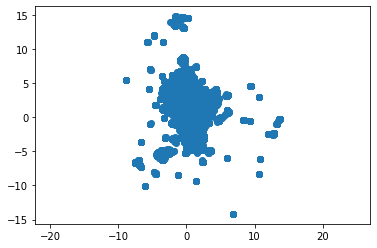

In [ ]:
#quick plot to take a look
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])
    
plt.gca().set_aspect('equal', 'datalim')


In [ ]:
embedding_df = pd.DataFrame(embedding)
embedding_df['gene_symbol'] = all_embeddings['gene_symbol']
embedding_df = embedding_df.rename(columns={1: 'UMAP 1', 0: 'UMAP 0'})
embedding_df.head()

,UMAP 0,UMAP 1,gene_symbol
0,2.060159,-4.516695,A1BG
1,0.310253,3.842524,A1CF
2,0.843708,-2.065924,A2M
3,0.585610,-1.930503,A2ML1
4,-0.498233,-2.672696,A3GALT2


In [ ]:
#reorder columns
cols = embedding_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
embedding_df = embedding_df[cols]

In [ ]:
embedding_df.to_csv(os.path.join(embedding_file_path_processed, "gene_symbol_summarized_UMAP.csv"))